### Explain whether getRandomDirection can sample directions that are well distributed on a Sphere

I have tested whether getRandomDirection is on a sphere in uclcg file. Now test whether points are well-distributed on a sphere.

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [340]:
def sample_points(sample_number):
    coords = np.zeros((3, sample_number))
    for i in range(sample_number):
        e0, e1 = np.random.random(2)
        theta = np.arccos(2 * e0 - 1)
        phi = e1 * 2 * np.pi
        coords[0, i] = np.sin(theta) * np.cos(phi)
        coords[1, i] = np.sin(theta) * np.sin(phi)
        coords[2, i] = np.cos(theta)
    return coords

#### Visualise 1000 samplie points in 3D space from X/Y/Z axis

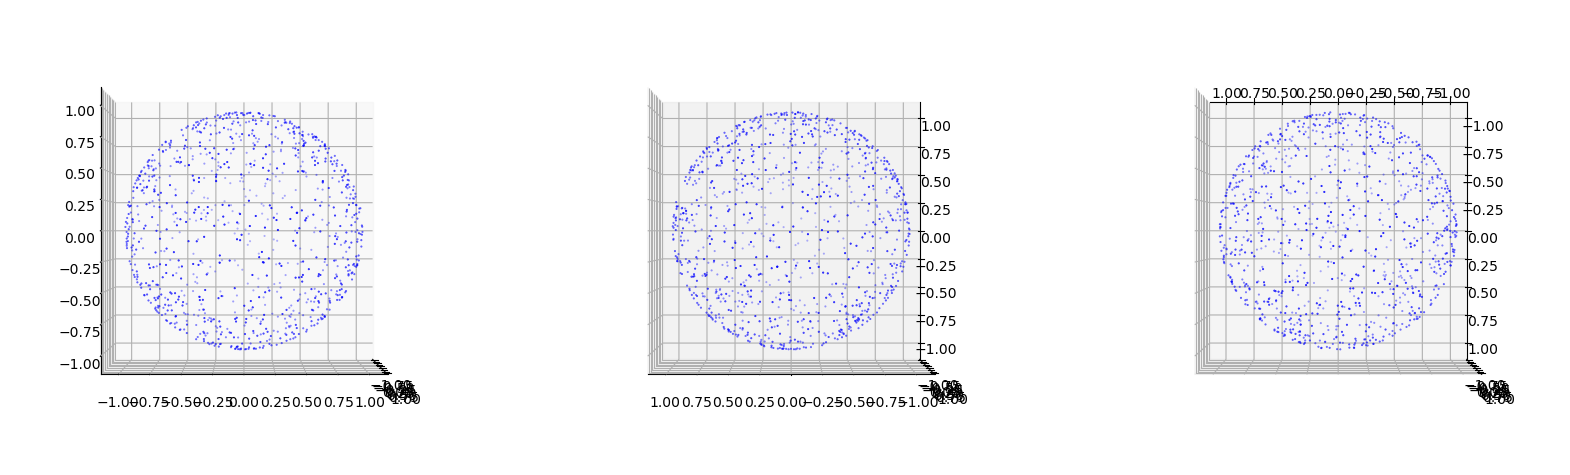

In [341]:
coords = sample_points(1000)
x = coords[0, :]
y = coords[1, :]
z = coords[2, :]
fig = plt.figure(figsize=(20,10))
axl = fig.add_subplot(131,projection='3d')
axl.set_box_aspect([1, 1, 1])
axl.view_init(0, 0)
axl.scatter(x,y,z,s=1,c='b',marker='.')
axl = fig.add_subplot(132,projection='3d')
axl.set_box_aspect([1, 1, 1])
axl.view_init(0, 90)
axl.scatter(x,y,z,s=1,c='b',marker='.')
axl = fig.add_subplot(133,projection='3d')
axl.set_box_aspect([1, 1, 1])
axl.view_init(90, 90)
axl.scatter(x,y,z,s=1,c='b',marker='.')
plt.show()

In [342]:
def partition_check(x, y, z, num_partitions=10):
    # Convert spherical coordinates to Cartesian coordinates
    r = np.sqrt(x**2 + y**2 + z**2)
    theta = np.arctan2(y, x)
    phi = np.arccos(z / r)

    # Normalize theta to be in [0, 2*pi]
    theta = (theta + 2 * np.pi) % (2 * np.pi)

    # Create partitions with equal area in theta and phi
    theta_partitions = np.linspace(0, 2 * np.pi, num_partitions + 1)
    phi_partitions = np.linspace(0, np.pi, num_partitions + 1)

    # Compute the bin indices for each point
    theta_indices = np.digitize(theta, theta_partitions) - 1
    phi_indices = np.digitize(phi, phi_partitions) - 1

    # Count the number of points in each partition
    counts = np.zeros((num_partitions, num_partitions))
    for i in range(len(x)):
        counts[theta_indices[i], phi_indices[i]] += 1

    # Calculate areas of each partition
    delta_theta = 2 * np.pi / num_partitions
    partition_areas = np.abs((np.sin(phi_partitions[1:]) - np.sin(phi_partitions[:-1])) * delta_theta)
    partition_areas = np.hstack((partition_areas[:num_partitions//2][::-1], partition_areas[:num_partitions//2]))
    normalized_counts = counts / partition_areas
    normalized_counts /= np.max(normalized_counts)
    return normalized_counts, counts, partition_areas

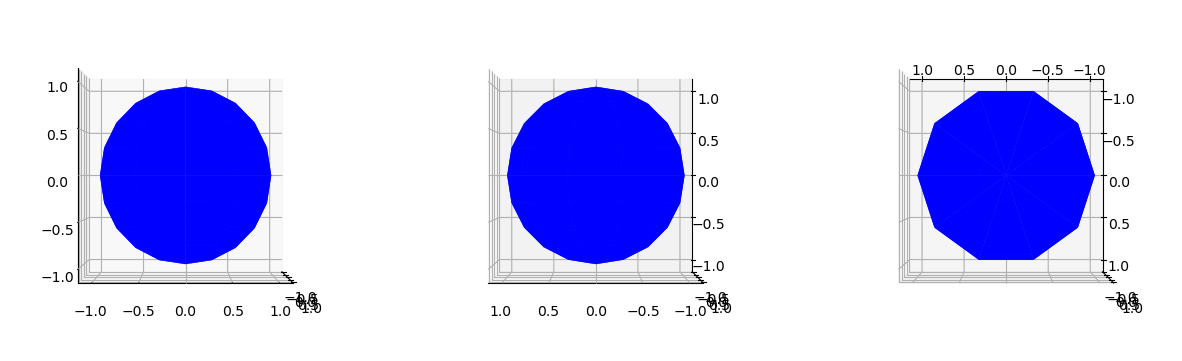

In [345]:
coords = sample_points(1000000)
x = coords[0, :]
y = coords[1, :]
z = coords[2, :]

num_partitions = 10
normalized_counts, counts, areas = partition_check(x, y, z, num_partitions)
theta_bins, phi_bins = np.meshgrid(np.linspace(0, 2 * np.pi, num_partitions + 1),
                                   np.linspace(0, np.pi, num_partitions + 1))
# Plot the results
fig = plt.figure(figsize=(15, 30))
ax = fig.add_subplot(131, projection='3d')
ax.scatter(x, y, z, s=0, c='b', marker='.', label='Points on Sphere')
ax.set_box_aspect([1, 1, 1])
ax.view_init(0, 0)
for i in range(num_partitions):
    for j in range(num_partitions):
        alpha = normalized_counts[i, j]  # Adjust alpha based on density
        ax.plot_surface(np.sin(phi_bins[i:i+2, j:j+2]) * np.cos(theta_bins[i:i+2, j:j+2]),
                        np.sin(phi_bins[i:i+2, j:j+2]) * np.sin(theta_bins[i:i+2, j:j+2]),
                        np.cos(phi_bins[i:i+2, j:j+2]),
                        color='b', alpha=alpha, antialiased=True, shade=False)
ax = fig.add_subplot(132, projection='3d')
ax.scatter(x, y, z, s=0, c='b', marker='.', label='Points on Sphere')
ax.set_box_aspect([1, 1, 1])
ax.view_init(0, 90)
for i in range(num_partitions):
    for j in range(num_partitions):
        alpha = normalized_counts[i, j]  # Adjust alpha based on density
        ax.plot_surface(np.sin(phi_bins[i:i+2, j:j+2]) * np.cos(theta_bins[i:i+2, j:j+2]),
                        np.sin(phi_bins[i:i+2, j:j+2]) * np.sin(theta_bins[i:i+2, j:j+2]),
                        np.cos(phi_bins[i:i+2, j:j+2]),
                        color='b', alpha=alpha, antialiased=True, shade=False)
ax = fig.add_subplot(133, projection='3d')
ax.scatter(x, y, z, s=0, c='b', marker='.', label='Points on Sphere')
ax.set_box_aspect([1, 1, 1])
ax.view_init(90, 90)
for i in range(num_partitions):
    for j in range(num_partitions):
        alpha = normalized_counts[i, j]  # Adjust alpha based on density
        ax.plot_surface(np.sin(phi_bins[i:i+2, j:j+2]) * np.cos(theta_bins[i:i+2, j:j+2]),
                        np.sin(phi_bins[i:i+2, j:j+2]) * np.sin(theta_bins[i:i+2, j:j+2]),
                        np.cos(phi_bins[i:i+2, j:j+2]),
                        color='b', alpha=alpha, antialiased=True, shade=False)
plt.show()